# Notebook 2: Rotations & Interference 🌊

📘 **Notebook 2/7**: Rotations & Interference  
⏱️ **Estimated Duration**: 20 min  
🎯 **What You'll Learn**:
   - Pauli gates (X, Y, Z) as rotations on the Bloch sphere
   - Arbitrary rotations with RX, RY, RZ gates
   - Quantum phase: the "invisible" property that enables interference
   - **Quantum interference**: THE key to quantum advantage!

**Progress**: ⬛⬛⬜⬜⬜⬜⬜ (2/7)

---

### 🎯 Why This Notebook Matters

In the last notebook, we saw that superposition gives 50/50 measurement results — just like classical randomness. So what makes quantum special?

The answer is **interference**. Quantum amplitudes can:
- **Add up** (constructive interference) → probability increases
- **Cancel out** (destructive interference) → probability becomes ZERO

This is impossible with classical probability! This is how quantum algorithms find correct answers faster.

## 🤔 INTUITION: Spinning Globes and Ocean Waves

### 🌍 Rotations = Spinning a Globe

Imagine a globe with a pin at the North Pole (|0⟩):
- **Spin around vertical axis** → pin stays at North Pole (Z rotation)
- **Tip the globe forward** → pin moves to equator or South Pole (Y rotation)
- **Rotate around horizontal axis** → pin traces a different path (X rotation)

Quantum gates are exactly this: **rotations on the Bloch sphere!**

### 🌊 Interference = Ocean Waves Meeting

Think of two water waves approaching each other:

| Wave Meeting | Result | Quantum Analog |
|--------------|--------|----------------|
| Peak meets Peak | **BIGGER wave** (constructive) | Amplitudes add → higher probability |
| Peak meets Trough | **Waves cancel** (destructive) | Amplitudes subtract → probability = 0 |

Classical probability is always positive (can't cancel). Quantum amplitudes can be positive OR negative — they interfere like waves!

## Section 1: Environment Setup

Let's import our quantum tools.

In [1]:
# Quantum computing framework
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# Visualization
import numpy as np
import matplotlib.pyplot as plt

# Custom plotting utilities
import sys
sys.path.append('..')
from utils.plotting import configure_beautiful_plots, COLORS

# Configure beautiful plots
configure_beautiful_plots()

print("✅ All imports successful!")
print("✅ Ready to explore rotations and interference")

✅ All imports successful!
✅ Ready to explore rotations and interference


## 💡 CONCEPT: The Pauli Gates

We've seen the X gate. There are two more fundamental gates:

**X gate** (bit flip):
- 180° rotation around X-axis
- |0⟩ ↔ |1⟩

**Y gate**:
- 180° rotation around Y-axis
- |0⟩ → i|1⟩, |1⟩ → -i|0⟩
- Like X but adds phase

**Z gate** (phase flip):
- 180° rotation around Z-axis
- |0⟩ → |0⟩, |1⟩ → -|1⟩
- Doesn't change measurement probabilities!

The Z gate is special: it changes the quantum state without affecting measurement outcomes directly.

## 💻 IMPLEMENTATION: Visualizing Pauli Gates

Visualizing 180° Rotations on the Bloch Sphere

--- X GATE: Rotation around X-axis ---
Before X: |0⟩ (North Pole)


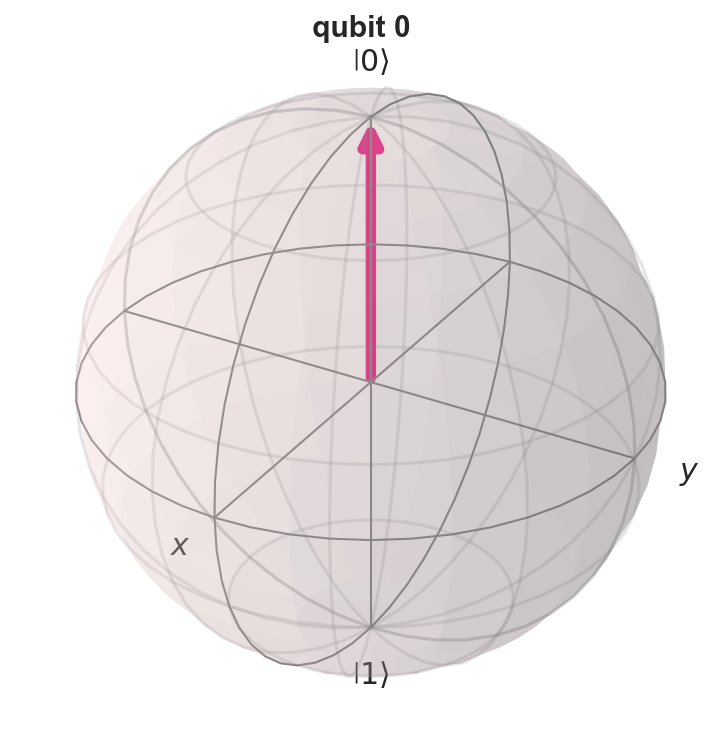


After X: |1⟩ (South Pole)
→ Flipped 180° around X-axis


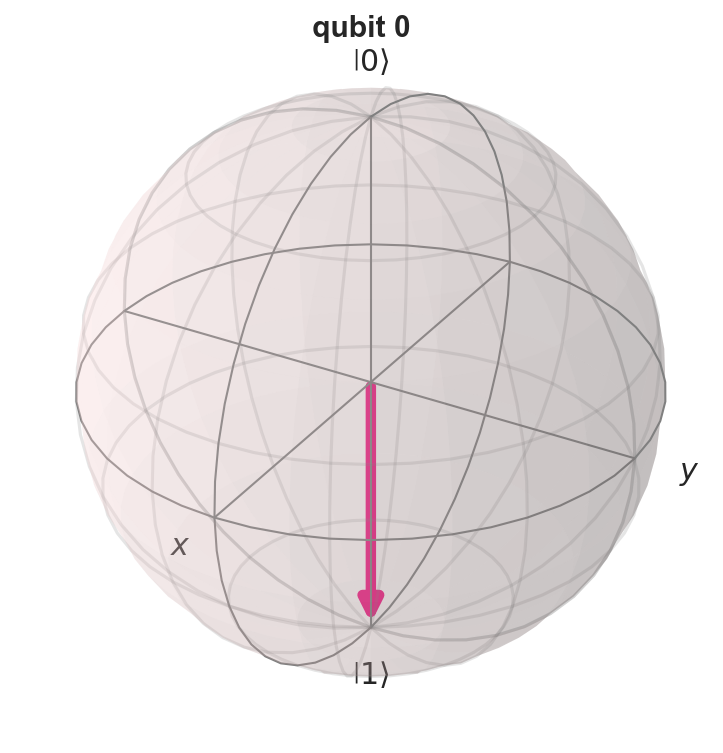


--- Y GATE: Rotation around Y-axis ---
Before Y: |0⟩ (North Pole)


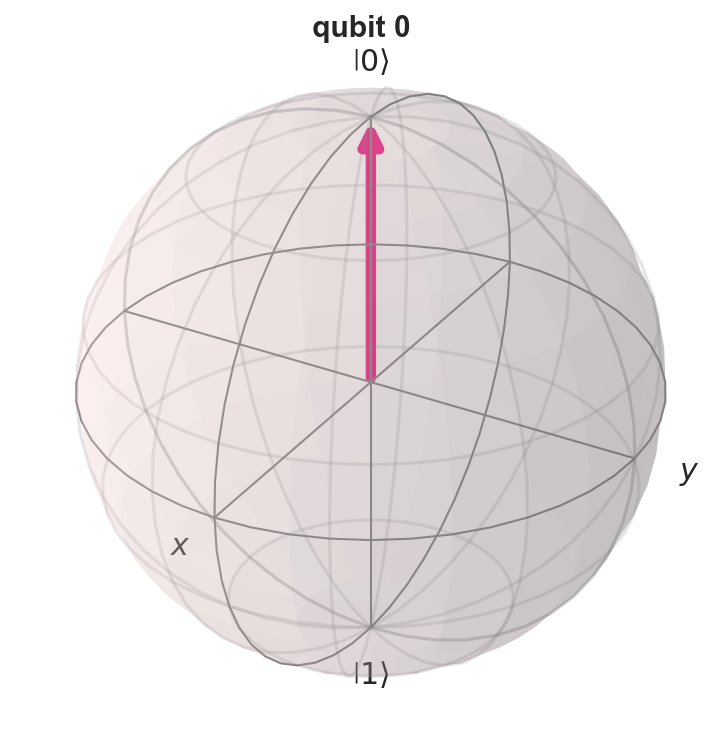


After Y: i|1⟩ (South Pole, with phase)
→ Flipped 180° around Y-axis


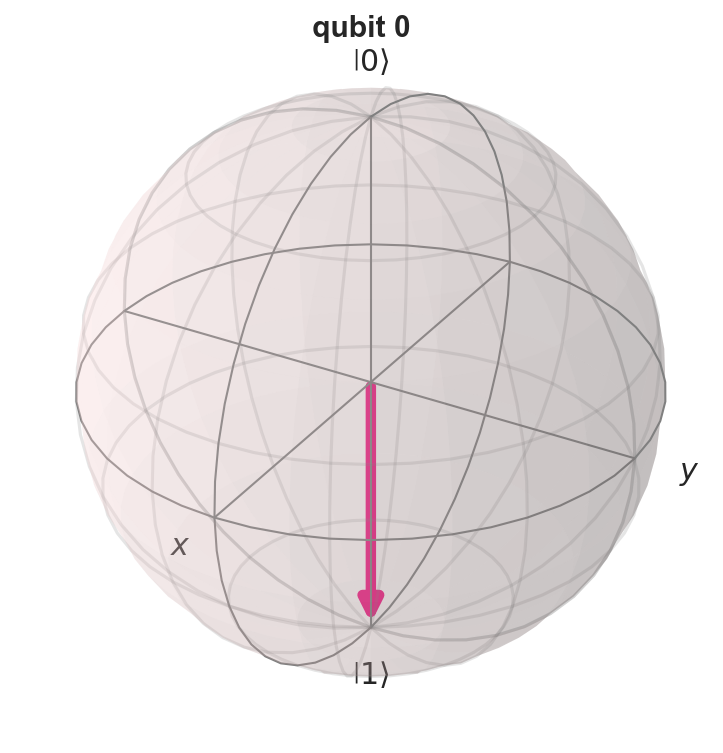


--- Z GATE: Rotation around Z-axis ---
Before Z: |+⟩ (Equator, +X)


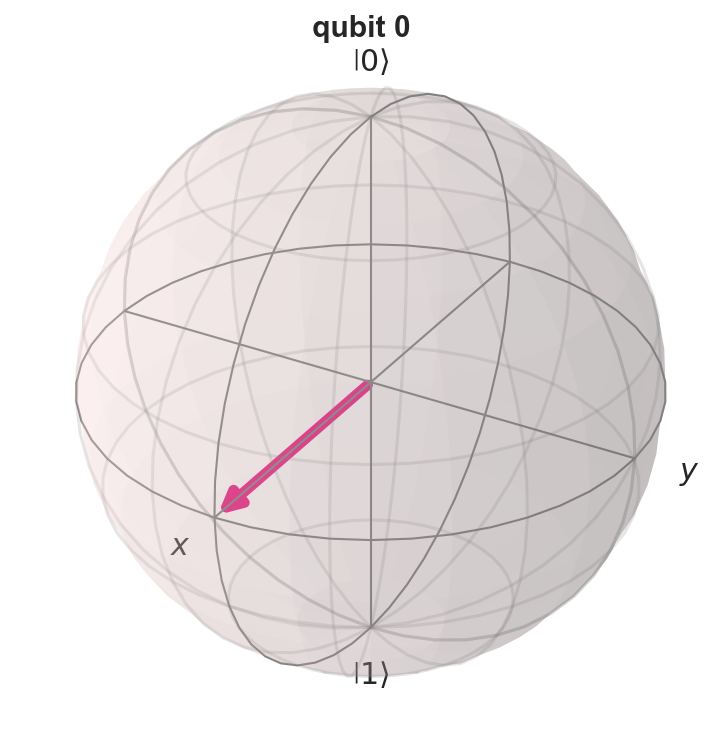


After Z: |−⟩ (Equator, -X)
→ Rotated 180° around Z-axis


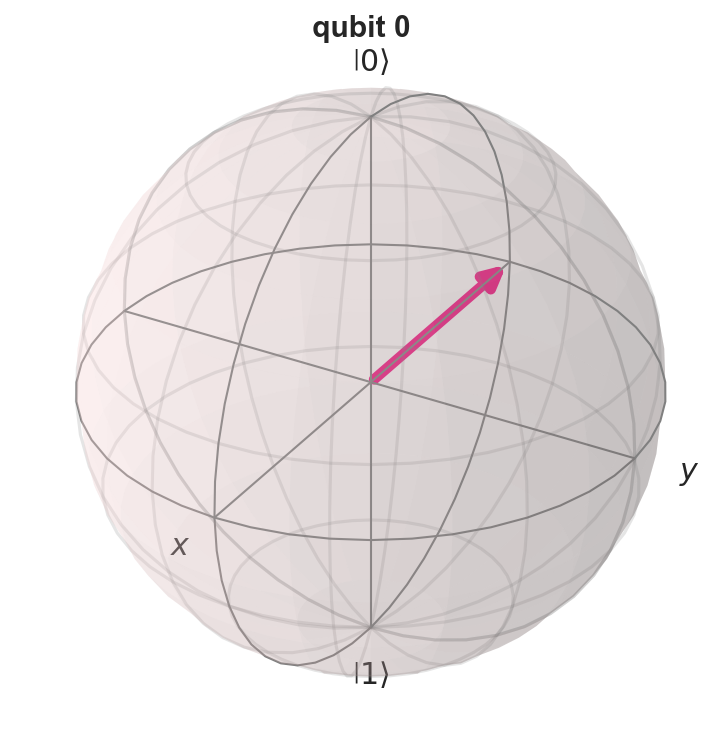


🔄 Key insight: Choose the right starting state to see each rotation!


In [2]:
# Pauli Gates: See the Rotations Clearly
print("Visualizing 180° Rotations on the Bloch Sphere")
print("="*50)

# X gate: Start from |0⟩ to see the flip
print("\n--- X GATE: Rotation around X-axis ---")
qc_0 = QuantumCircuit(1)
sv_0 = Statevector(qc_0)
print("Before X: |0⟩ (North Pole)")
display(plot_bloch_multivector(sv_0))

qc_x = QuantumCircuit(1)
qc_x.x(0)
sv_x = Statevector(qc_x)
print("\nAfter X: |1⟩ (South Pole)")
print("→ Flipped 180° around X-axis")
display(plot_bloch_multivector(sv_x))

# Y gate: Start from |0⟩ 
print("\n--- Y GATE: Rotation around Y-axis ---")
print("Before Y: |0⟩ (North Pole)")
display(plot_bloch_multivector(sv_0))

qc_y = QuantumCircuit(1)
qc_y.y(0)
sv_y = Statevector(qc_y)
print("\nAfter Y: i|1⟩ (South Pole, with phase)")
print("→ Flipped 180° around Y-axis")
display(plot_bloch_multivector(sv_y))

# Z gate: Start from |+⟩ to see something happen
print("\n--- Z GATE: Rotation around Z-axis ---")
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
sv_plus = Statevector(qc_plus)
print("Before Z: |+⟩ (Equator, +X)")
display(plot_bloch_multivector(sv_plus))

qc_z = QuantumCircuit(1)
qc_z.h(0)
qc_z.z(0)
sv_z = Statevector(qc_z)
print("\nAfter Z: |−⟩ (Equator, -X)")
print("→ Rotated 180° around Z-axis")
display(plot_bloch_multivector(sv_z))

print("\n🔄 Key insight: Choose the right starting state to see each rotation!")

## 💡 CONCEPT: Arbitrary Rotations

Pauli gates are 180° rotations. We can rotate by ANY angle!

**Rotation gates:**
- **RX(θ)**: Rotate θ radians around X-axis
- **RY(θ)**: Rotate θ radians around Y-axis
- **RZ(θ)**: Rotate θ radians around Z-axis

**Special cases:**
- RX(π) = X (180° = π radians)
- RY(π/2) = creates superposition from |0⟩
- RZ(π) = Z

**Universal fact**: ANY single-qubit gate can be built from rotations!

## 💻 IMPLEMENTATION: Smooth Rotations

RY Rotations: Smooth transition from |0⟩ to |1⟩

Angle: 0° (|0⟩)


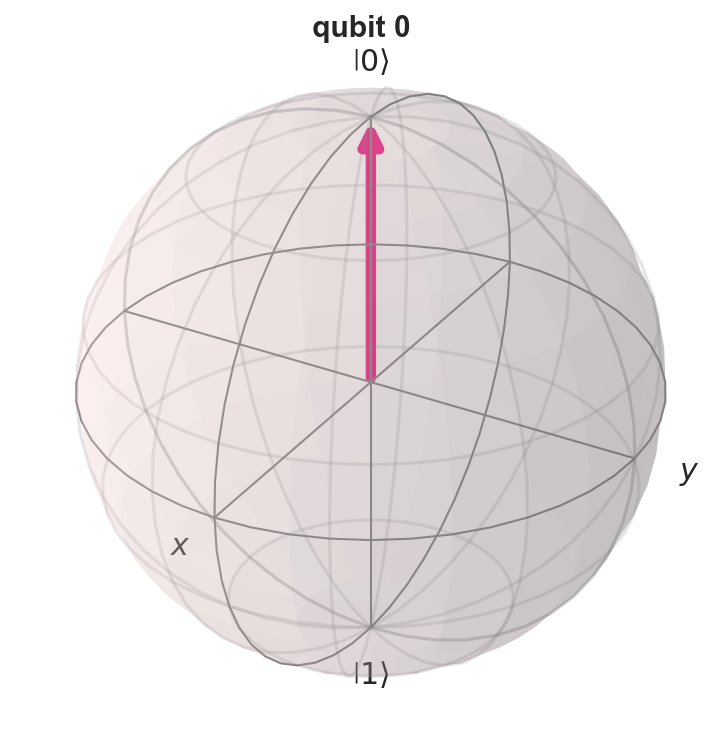


Angle: 45°


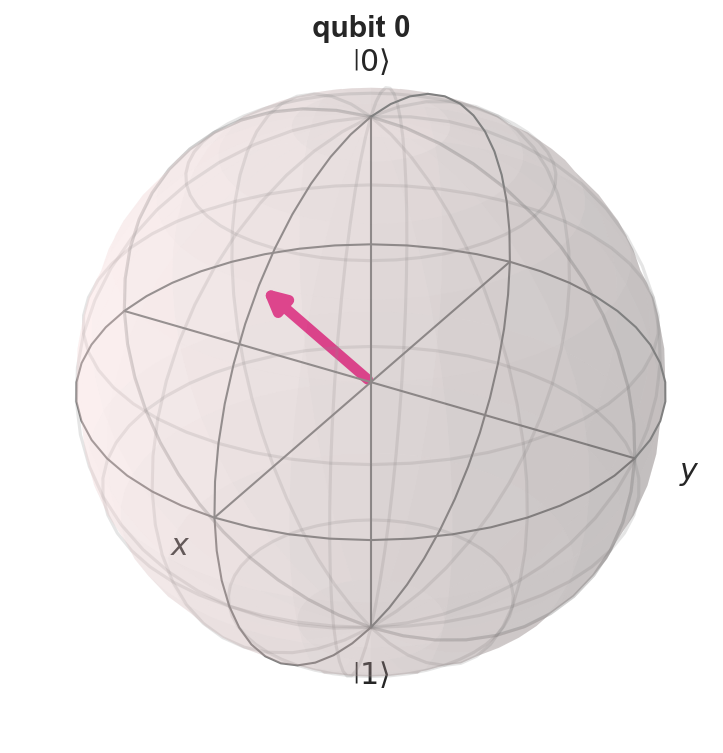


Angle: 90° (|+⟩)


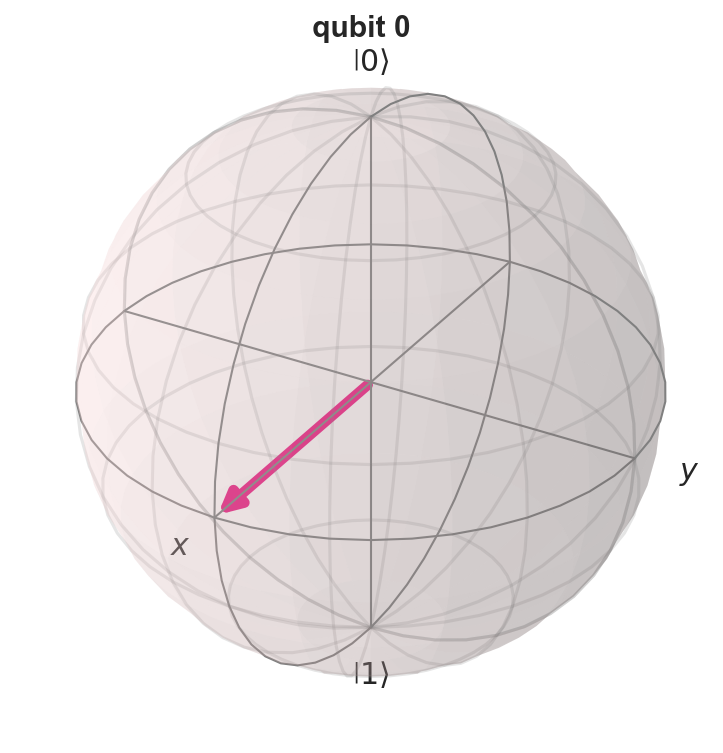


Angle: 135°


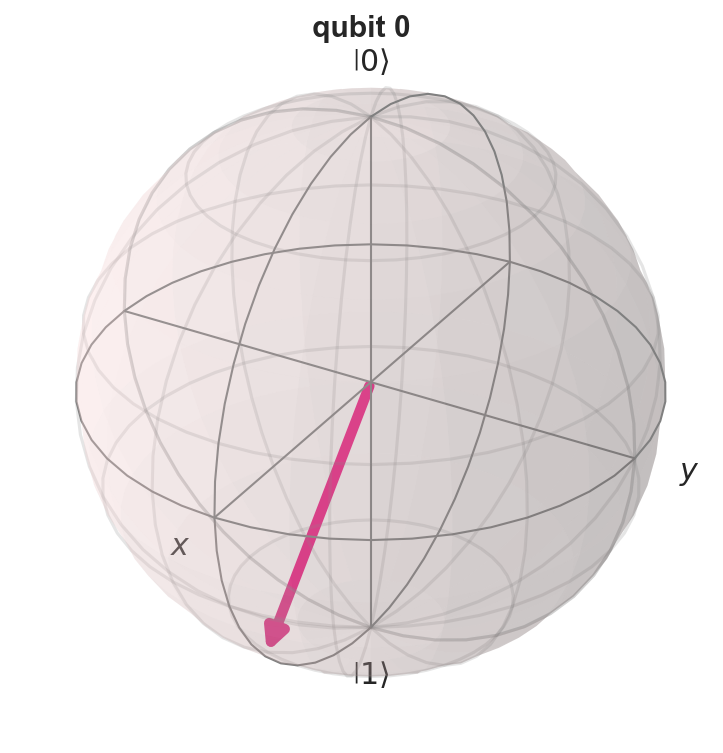


Angle: 180° (|1⟩)


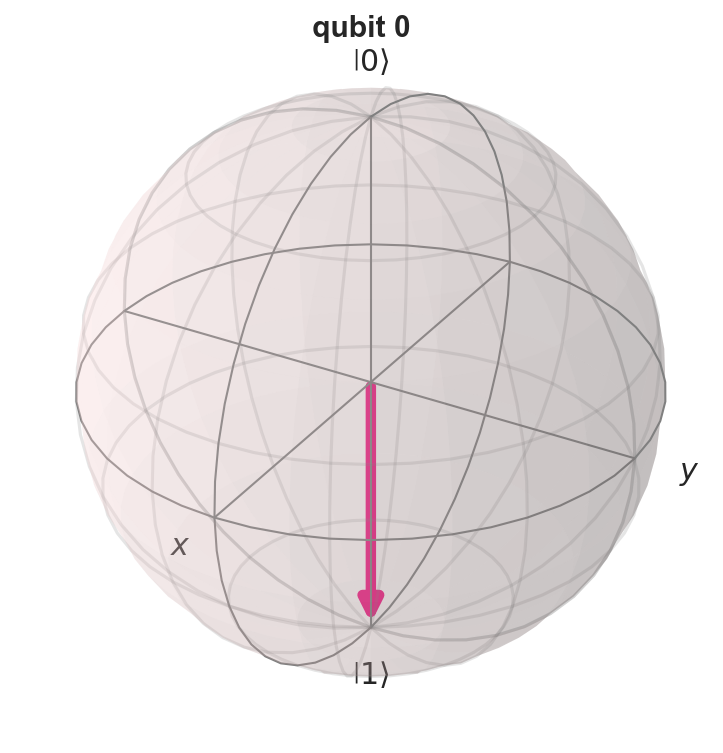


🎯 Rotations allow continuous control of quantum states!


In [3]:
# Demonstrate smooth rotation around Y-axis
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
angle_names = ["0° (|0⟩)", "45°", "90° (|+⟩)", "135°", "180° (|1⟩)"]

print("RY Rotations: Smooth transition from |0⟩ to |1⟩")
print("="*50)

for angle, name in zip(angles, angle_names):
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    sv = Statevector(qc)
    
    print(f"\nAngle: {name}")
    display(plot_bloch_multivector(sv))

print("\n🎯 Rotations allow continuous control of quantum states!")

## 💡 CONCEPT: What is Phase?

**Two superposition states:**
- |+⟩ = (|0⟩ + |1⟩)/√2
- |−⟩ = (|0⟩ - |1⟩)/√2

Both give 50/50 measurement probabilities!

**The minus sign is the "phase":**
- It's like a wave: positive peak vs negative trough
- Doesn't affect single measurements
- **BUT** creates interference when combined!

Let's verify they have the same measurement statistics:

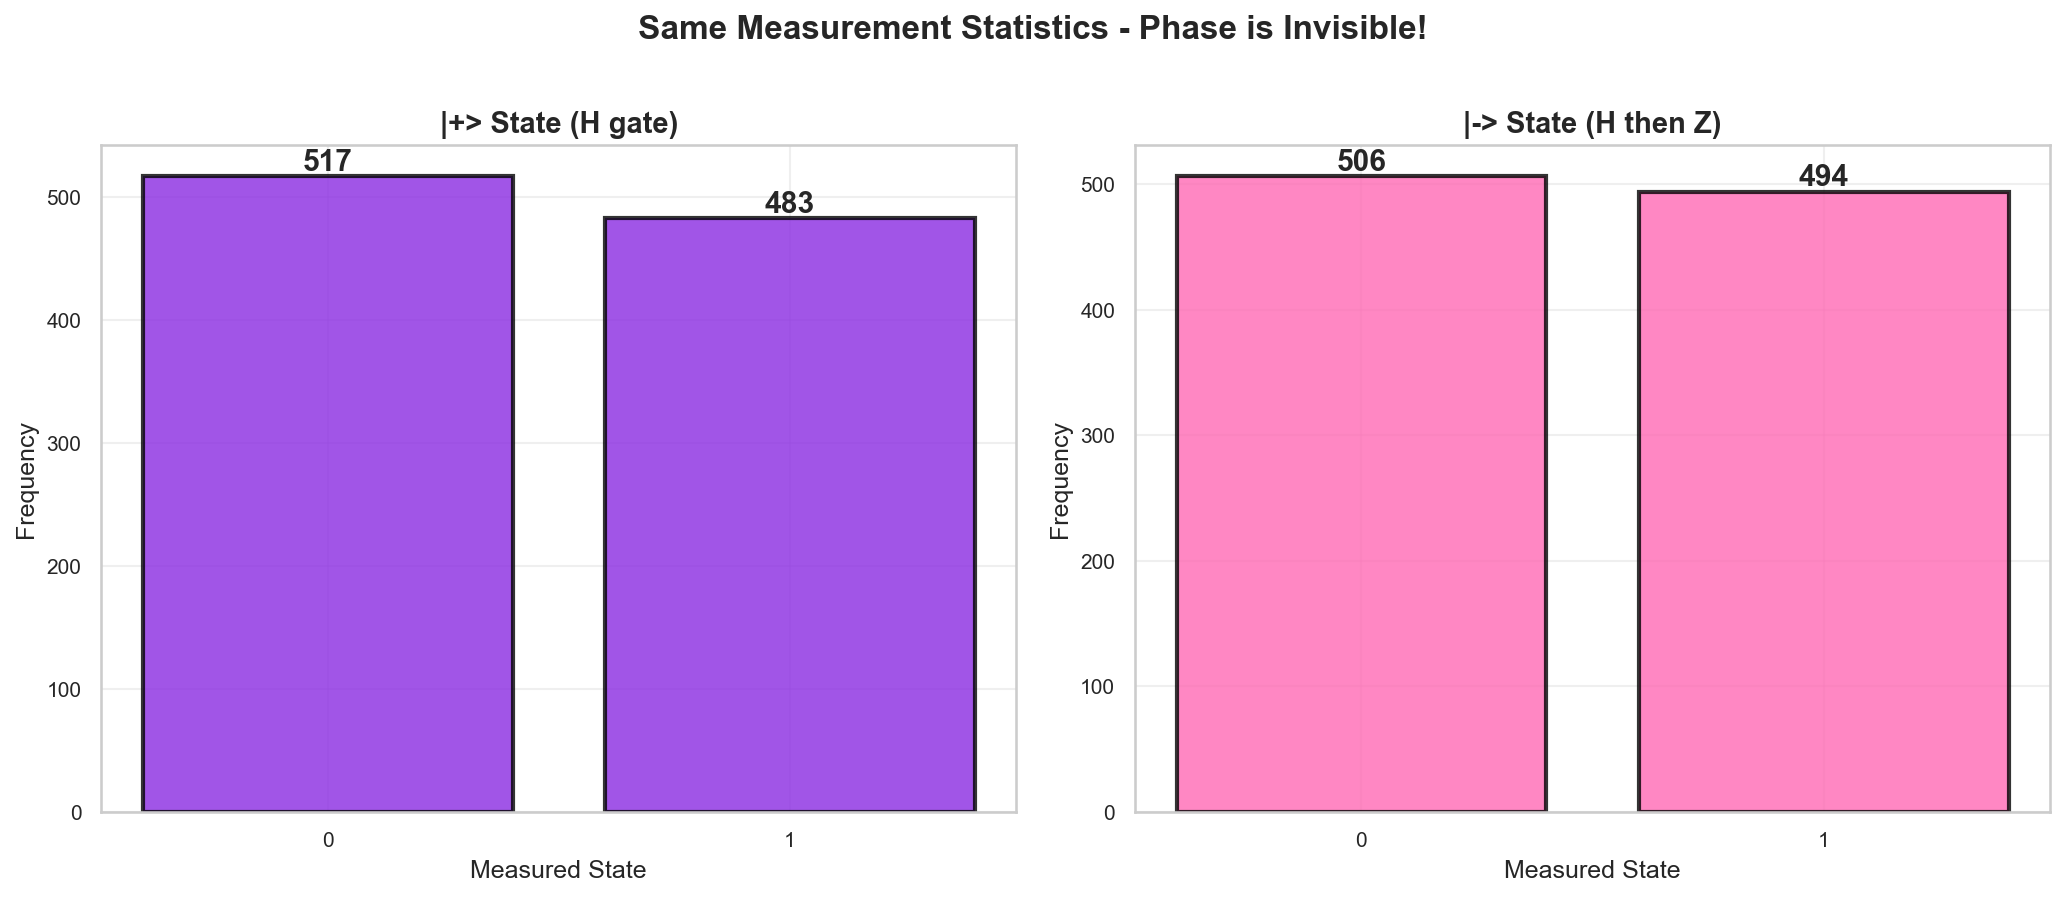


🎭 Phase is invisible in direct measurement!
   Both |+> and |-> give 50/50 results
   But the phase matters for interference...


In [4]:
# Measure |+⟩ state
qc_plus = QuantumCircuit(1, 1)
qc_plus.h(0)
qc_plus.measure(0, 0)

simulator = AerSimulator()
counts_plus = simulator.run(qc_plus, shots=1000).result().get_counts()

# Measure |−⟩ state (H then Z)
qc_minus = QuantumCircuit(1, 1)
qc_minus.h(0)
qc_minus.z(0)
qc_minus.measure(0, 0)

counts_minus = simulator.run(qc_minus, shots=1000).result().get_counts()

# Compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=150)

# |+⟩ state
c0_plus = counts_plus.get('0', 0)
c1_plus = counts_plus.get('1', 0)
ax1.bar(['0', '1'], [c0_plus, c1_plus], 
        color=COLORS['quantum'], edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_title('|+> State (H gate)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_xlabel('Measured State', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.text(0, c0_plus, f'{c0_plus}', ha='center', va='bottom', fontweight='bold')
ax1.text(1, c1_plus, f'{c1_plus}', ha='center', va='bottom', fontweight='bold')

# |−⟩ state
c0_minus = counts_minus.get('0', 0)
c1_minus = counts_minus.get('1', 0)
ax2.bar(['0', '1'], [c0_minus, c1_minus], 
        color=COLORS['primary'], edgecolor='black', linewidth=2, alpha=0.8)
ax2.set_title('|-> State (H then Z)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_xlabel('Measured State', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.text(0, c0_minus, f'{c0_minus}', ha='center', va='bottom', fontweight='bold')
ax2.text(1, c1_minus, f'{c1_minus}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Same Measurement Statistics - Phase is Invisible!', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🎭 Phase is invisible in direct measurement!")
print("   Both |+> and |-> give 50/50 results")
print("   But the phase matters for interference...")

## 💡 CONCEPT: Quantum Interference Experiment

**The key experiment:**
1. Start with |0⟩
2. Apply H → creates |+⟩ = (|0⟩ + |1⟩)/√2
3. Apply H again → what happens?

**Classical prediction:** Random! Should stay 50/50

**Quantum reality:** Back to |0⟩ with certainty!

This is **interference** - the amplitudes add up constructively for |0⟩ and destructively for |1⟩.

## 💻 IMPLEMENTATION: H-H Interference

Circuit: H - H


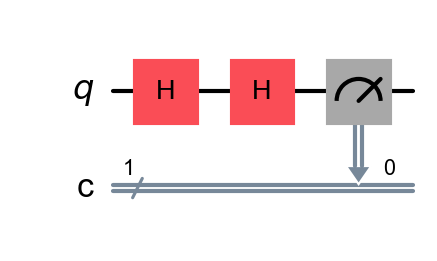


📊 Results (1000 measurements):
   State |0⟩: 1000 times
   State |1⟩: 0 times


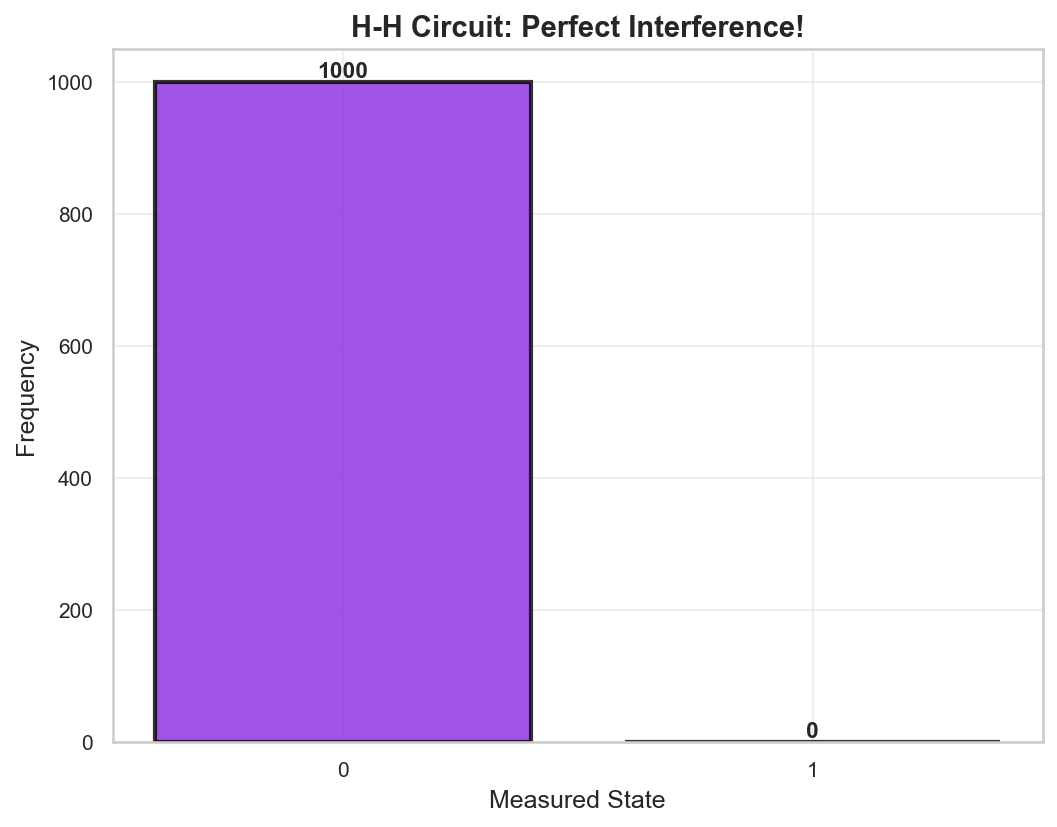


✨ ALWAYS |0⟩! This is quantum interference!
   Classical randomness would give 50/50
   Quantum: amplitudes interfere constructively for |0⟩


In [5]:
# Circuit: H - H
qc = QuantumCircuit(1, 1)
qc.h(0)  # First H: |0⟩ → |+⟩
qc.h(0)  # Second H: |+⟩ → ???
qc.measure(0, 0)

print("Circuit: H - H")
display(qc.draw('mpl'))

# Execute
counts = simulator.run(qc, shots=1000).result().get_counts()

print("\n📊 Results (1000 measurements):")
print(f"   State |0⟩: {counts.get('0', 0)} times")
print(f"   State |1⟩: {counts.get('1', 0)} times")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
states = ['0', '1']
values = [counts.get('0', 0), counts.get('1', 0)]
ax.bar(states, values, color=COLORS['quantum'], 
       edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Measured State', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('H-H Circuit: Perfect Interference!', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(values):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.show()

print("\n✨ ALWAYS |0⟩! This is quantum interference!")
print("   Classical randomness would give 50/50")
print("   Quantum: amplitudes interfere constructively for |0⟩")

## 💡 CONCEPT: Why Does H-H = Identity?

**Mathematical explanation:**

First H:
$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Second H expands each term:
$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$
$$H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

Combined:
$$H\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) = \frac{1}{2}(|0\rangle + |1\rangle + |0\rangle - |1\rangle) = |0\rangle$$

**The |1⟩ terms cancel! This is destructive interference.**

## 💻 IMPLEMENTATION: Breaking Interference with Z

Circuit: H - Z - H


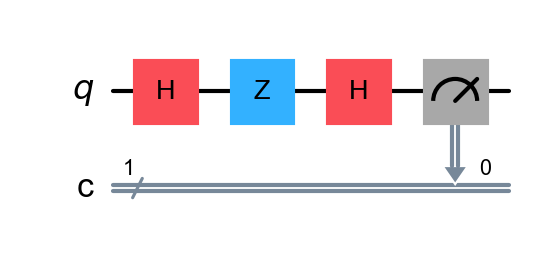


📊 Results (1000 measurements):
   State |0⟩: 0 times
   State |1⟩: 1000 times


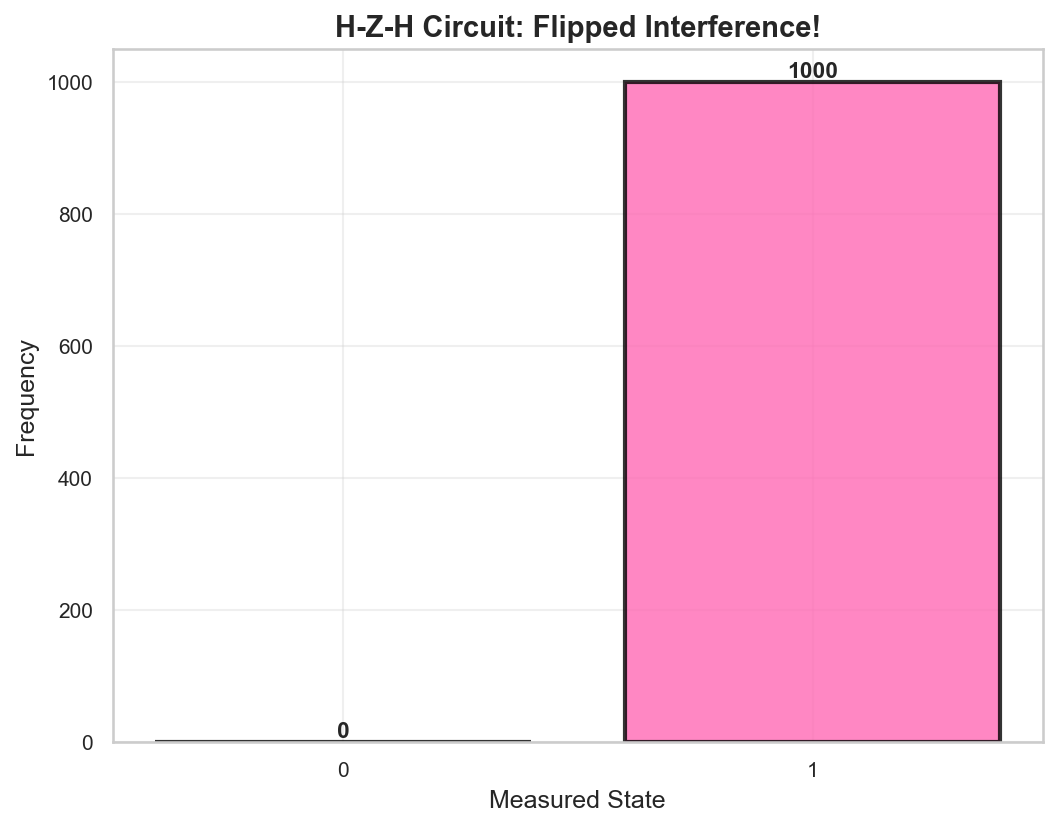


✨ Now ALWAYS |1⟩!
   The Z gate flipped the phase
   Now |0⟩ cancels and |1⟩ constructively interferes!


In [6]:
# What if we add a Z gate between the two H gates?
# Circuit: H - Z - H

qc_hzh = QuantumCircuit(1, 1)
qc_hzh.h(0)   # |0⟩ → |+⟩ = (|0⟩ + |1⟩)/√2
qc_hzh.z(0)   # |+⟩ → |−⟩ = (|0⟩ - |1⟩)/√2 (flip phase!)
qc_hzh.h(0)   # |−⟩ → ???
qc_hzh.measure(0, 0)

print("Circuit: H - Z - H")
display(qc_hzh.draw('mpl'))

# Execute
counts_hzh = simulator.run(qc_hzh, shots=1000).result().get_counts()

print("\n📊 Results (1000 measurements):")
print(f"   State |0⟩: {counts_hzh.get('0', 0)} times")
print(f"   State |1⟩: {counts_hzh.get('1', 0)} times")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
states = ['0', '1']
values = [counts_hzh.get('0', 0), counts_hzh.get('1', 0)]
ax.bar(states, values, color=COLORS['primary'], 
       edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Measured State', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('H-Z-H Circuit: Flipped Interference!', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(values):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.show()

print("\n✨ Now ALWAYS |1⟩!")
print("   The Z gate flipped the phase")
print("   Now |0⟩ cancels and |1⟩ constructively interferes!")

## 📊 VISUALIZATION: Interference Patterns

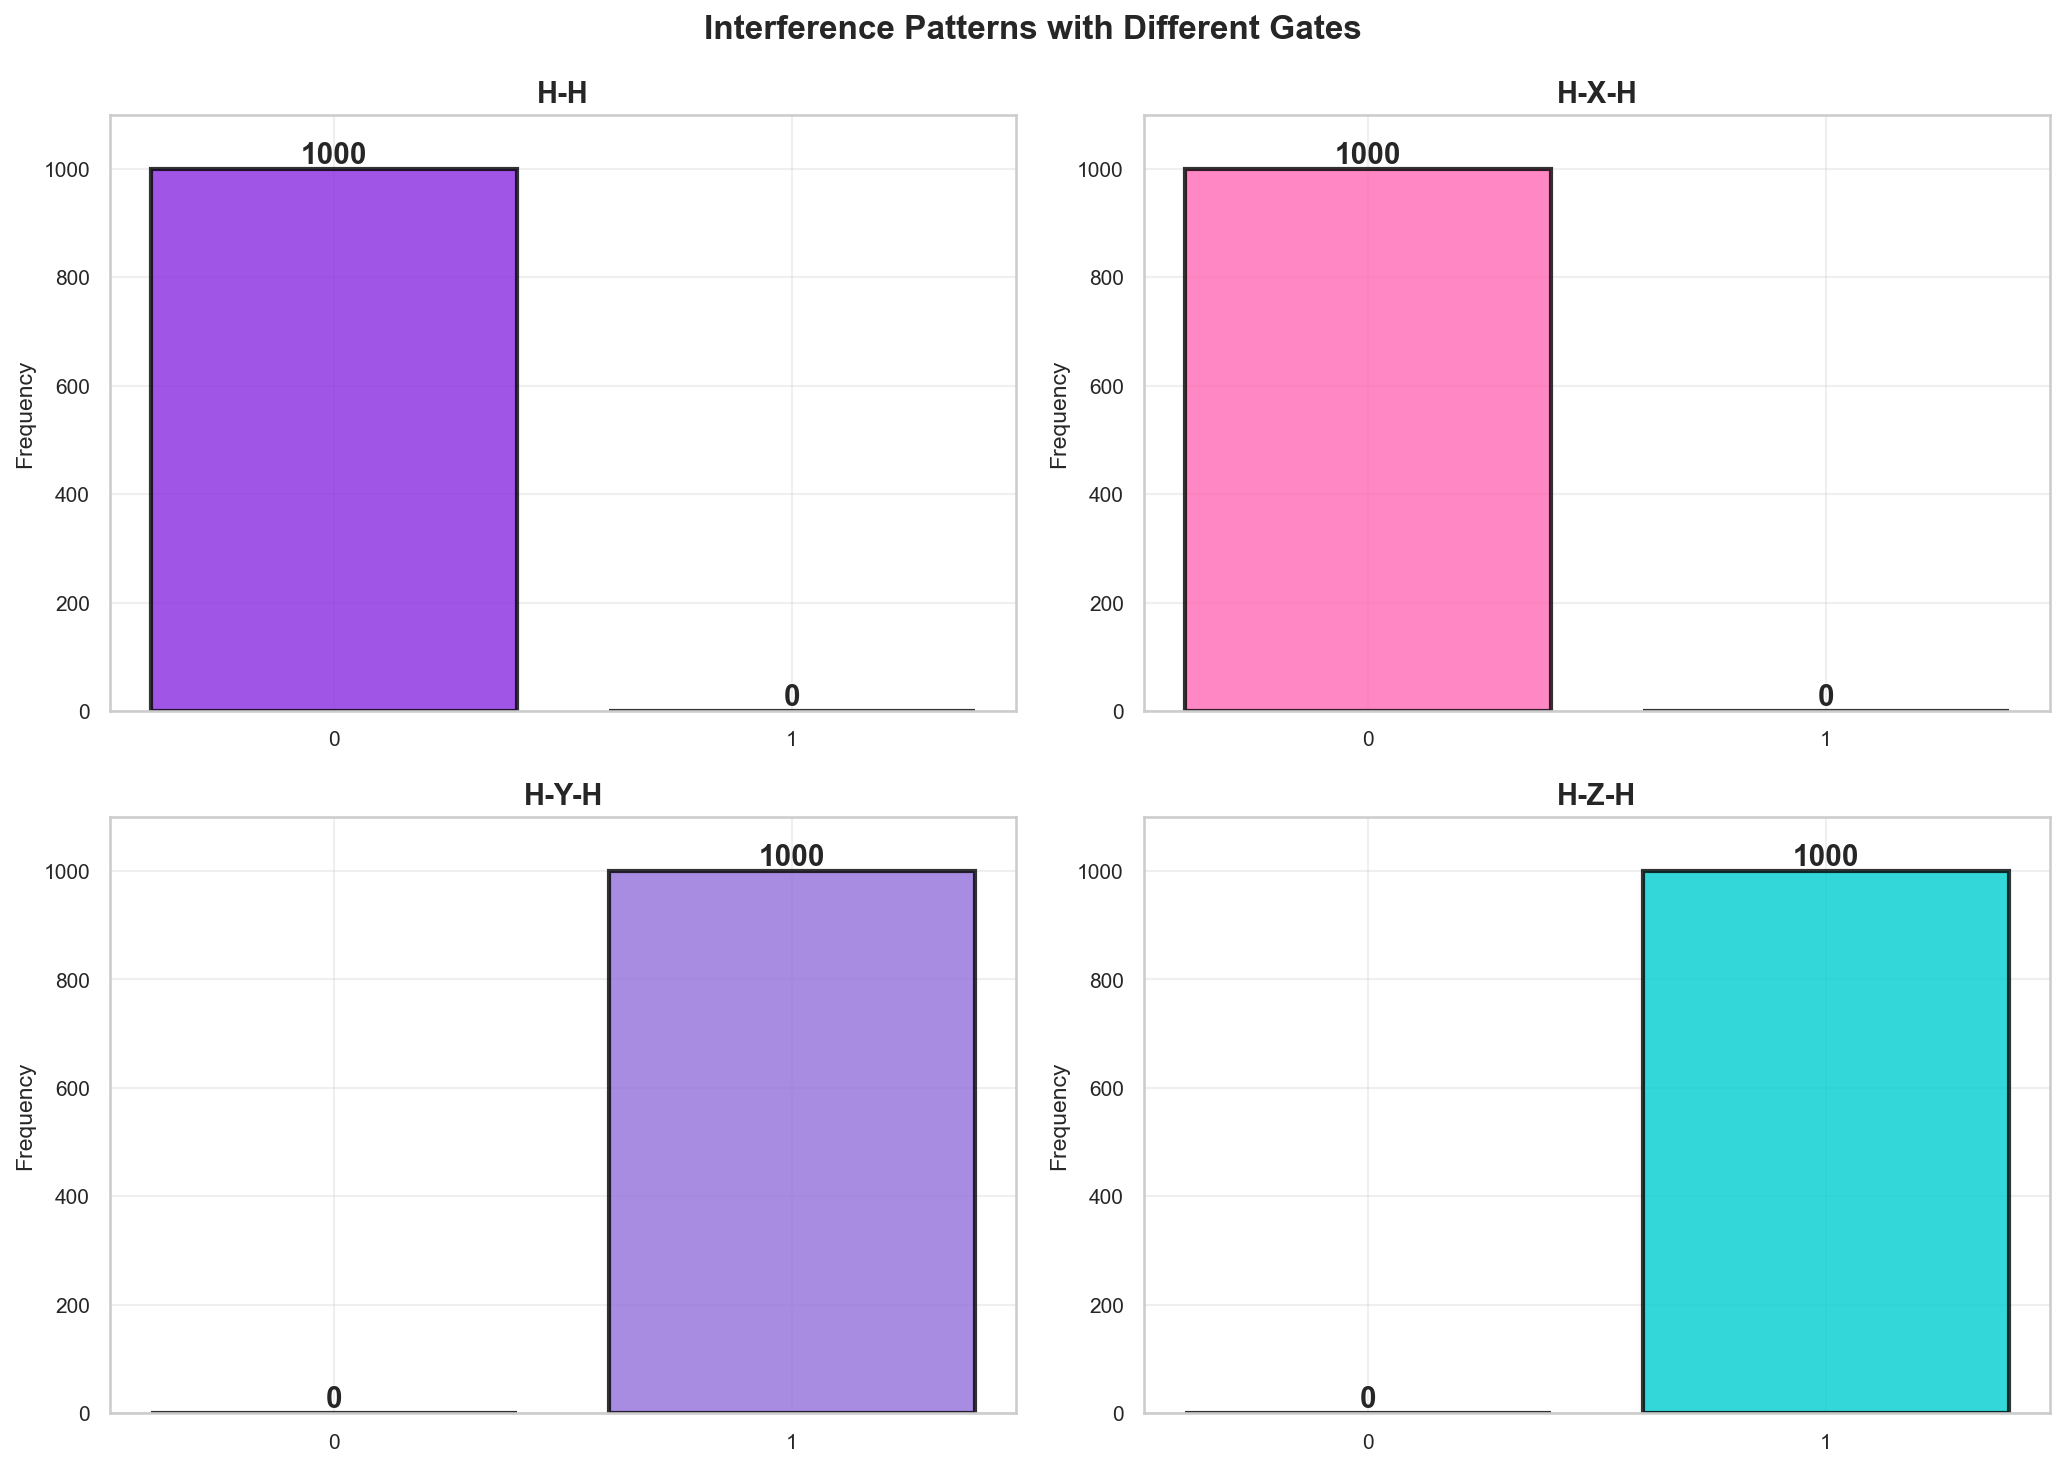


🌊 Different gates create different interference patterns!
   This is the essence of quantum computing


In [7]:
# Compare different interference patterns
circuits = [
    ("H-H", [('h', 0), ('h', 0)]),
    ("H-X-H", [('h', 0), ('x', 0), ('h', 0)]),
    ("H-Y-H", [('h', 0), ('y', 0), ('h', 0)]),
    ("H-Z-H", [('h', 0), ('z', 0), ('h', 0)])
]

results = []
for name, gates in circuits:
    qc = QuantumCircuit(1, 1)
    for gate, qubit in gates:
        if gate == 'h':
            qc.h(qubit)
        elif gate == 'x':
            qc.x(qubit)
        elif gate == 'y':
            qc.y(qubit)
        elif gate == 'z':
            qc.z(qubit)
    qc.measure(0, 0)
    counts = simulator.run(qc, shots=1000).result().get_counts()
    results.append((name, counts.get('0', 0), counts.get('1', 0)))

# Visualize all patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=150)
axes = axes.flatten()

colors = [COLORS['quantum'], COLORS['primary'], COLORS['secondary'], COLORS['accent']]

for i, (name, c0, c1) in enumerate(results):
    ax = axes[i]
    ax.bar(['0', '1'], [c0, c1], color=colors[i], 
           edgecolor='black', linewidth=2, alpha=0.8)
    ax.set_title(name, fontsize=14, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.text(0, c0, f'{c0}', ha='center', va='bottom', fontweight='bold')
    ax.text(1, c1, f'{c1}', ha='center', va='bottom', fontweight='bold')
    ax.set_ylim(0, 1100)

plt.suptitle('Interference Patterns with Different Gates', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🌊 Different gates create different interference patterns!")
print("   This is the essence of quantum computing")

## 💡 CONCEPT: Why Interference Matters

**This is THE difference between quantum and classical:**

**Classical probability:**
- Probabilities always add: P(A or B) = P(A) + P(B)
- Can't get below zero or above 1

**Quantum amplitudes:**
- Amplitudes can add OR subtract
- Can enhance (constructive) or cancel (destructive)
- This enables quantum algorithms to amplify correct answers!

**Key applications:**
- Grover's algorithm: amplify the correct answer
- Shor's algorithm: constructive interference for period
- Quantum simulation: natural evolution with interference

## 🎯 CHECKPOINT: Can you...

Check your understanding:

- [ ] Explain what the X, Y, and Z gates do geometrically?
- [ ] Create arbitrary rotations with RX, RY, RZ?
- [ ] Understand what quantum phase is?
- [ ] Explain why H-H returns to |0⟩?
- [ ] Describe constructive vs destructive interference?

## 🎯 Guided Exercise: Custom Interference

**Question**: Design a circuit that starts at |0⟩ and ends at |1⟩ with certainty, using only H and one Pauli gate.

🤔 **Think before coding**:
- [ ] H - H (gives |0⟩)
- [ ] H - X - H (gives ???)
- [ ] H - Z - H (gives |1⟩)

<details>
<summary>👉 Click for hint</summary>

We need interference that:
- Cancels |0⟩ amplitude (destructive)
- Doubles |1⟩ amplitude (constructive)

Which Pauli gate flips the phase to achieve this?

</details>

<details>
<summary>👉 Click for solution</summary>

```python
qc = QuantumCircuit(1, 1)
qc.h(0)   # |0⟩ → |+⟩
qc.z(0)   # |+⟩ → |−⟩ (flip phase)
qc.h(0)   # |−⟩ → |1⟩ (interference!)
qc.measure(0, 0)
```

The Z gate creates the phase flip needed for |1⟩ to interfere constructively!

</details>

In [8]:
# 🟢 Level 1: Test the solution
# Uncomment and run:

# qc = QuantumCircuit(1, 1)
# qc.h(0)
# qc.z(0)
# qc.h(0)
# qc.measure(0, 0)

# counts = simulator.run(qc, shots=1000).result().get_counts()
# print(f"Results: {counts}")

## 🎯 Quick Quiz

**1. What does the Z gate do to measurement probabilities?**
- [ ] Changes them completely
- [x] Doesn't change them at all
- [ ] Swaps |0⟩ and |1⟩ probabilities

**2. What is quantum phase?**
- [ ] The timing of the measurement
- [x] The relative sign between quantum amplitudes
- [ ] The temperature of the quantum computer

**3. What does H-H do starting from |0⟩?**
- [x] Returns to |0⟩ (interference)
- [ ] Gives 50/50 random result
- [ ] Gives |1⟩

**4. How does quantum differ from classical probability?**
- [ ] Quantum is just faster
- [x] Quantum amplitudes can interfere (cancel or enhance)
- [ ] They're identical

## 🎓 Notebook 2 Summary

**What you learned:**
✅ Pauli gates (X, Y, Z) as rotations on Bloch sphere  
✅ Arbitrary rotations with RX, RY, RZ gates  
✅ Quantum phase and why it's invisible in direct measurement  
✅ **Quantum interference** - constructive and destructive  
✅ H-H = identity due to interference  
✅ How phase control enables different interference patterns  

**Key Insight**: 
Quantum interference is THE fundamental difference from classical computing. Amplitudes can cancel (destructive) or enhance (constructive), enabling quantum algorithms to amplify correct answers!

**Progress**: ⬛⬛⬛⬜⬜⬜⬜ (3/7 completed)

---

## 🚀 Next Step: Notebook 3 - Two Qubits & CNOT

Now that you understand single-qubit operations, we'll explore:
- Working with multiple qubits
- The CNOT gate - conditional operations
- Creating entangled states (Bell states)

Multi-qubit systems are where quantum computing power really emerges! 🚀